In [3]:
impactfull = input('Its impacfull: ')
if impactfull == 'Yes':
    print('Continue')
else:
    print("Don't continue")

solvable = input('Its Solvable: ')
if solvable == 'Yes':
    print('Continue')
else:
    print('Don\'t continue')

actionable = input('Its Actionable: ')
if actionable == 'Yes':
    print('Continue')
else:
    print('Don\'t continue')
    

#with schemdraw.Drawing() as d:
#    d+= Data(w = 5).label('Input any Value')
#with schemdraw.Drawing() as d:
#    d+= Arrow(w = 5).left().label('Conector')

Its impacfull: yes
Don't continue
Its Solvable: yes
Don't continue
Its Actionable: yes
Don't continue


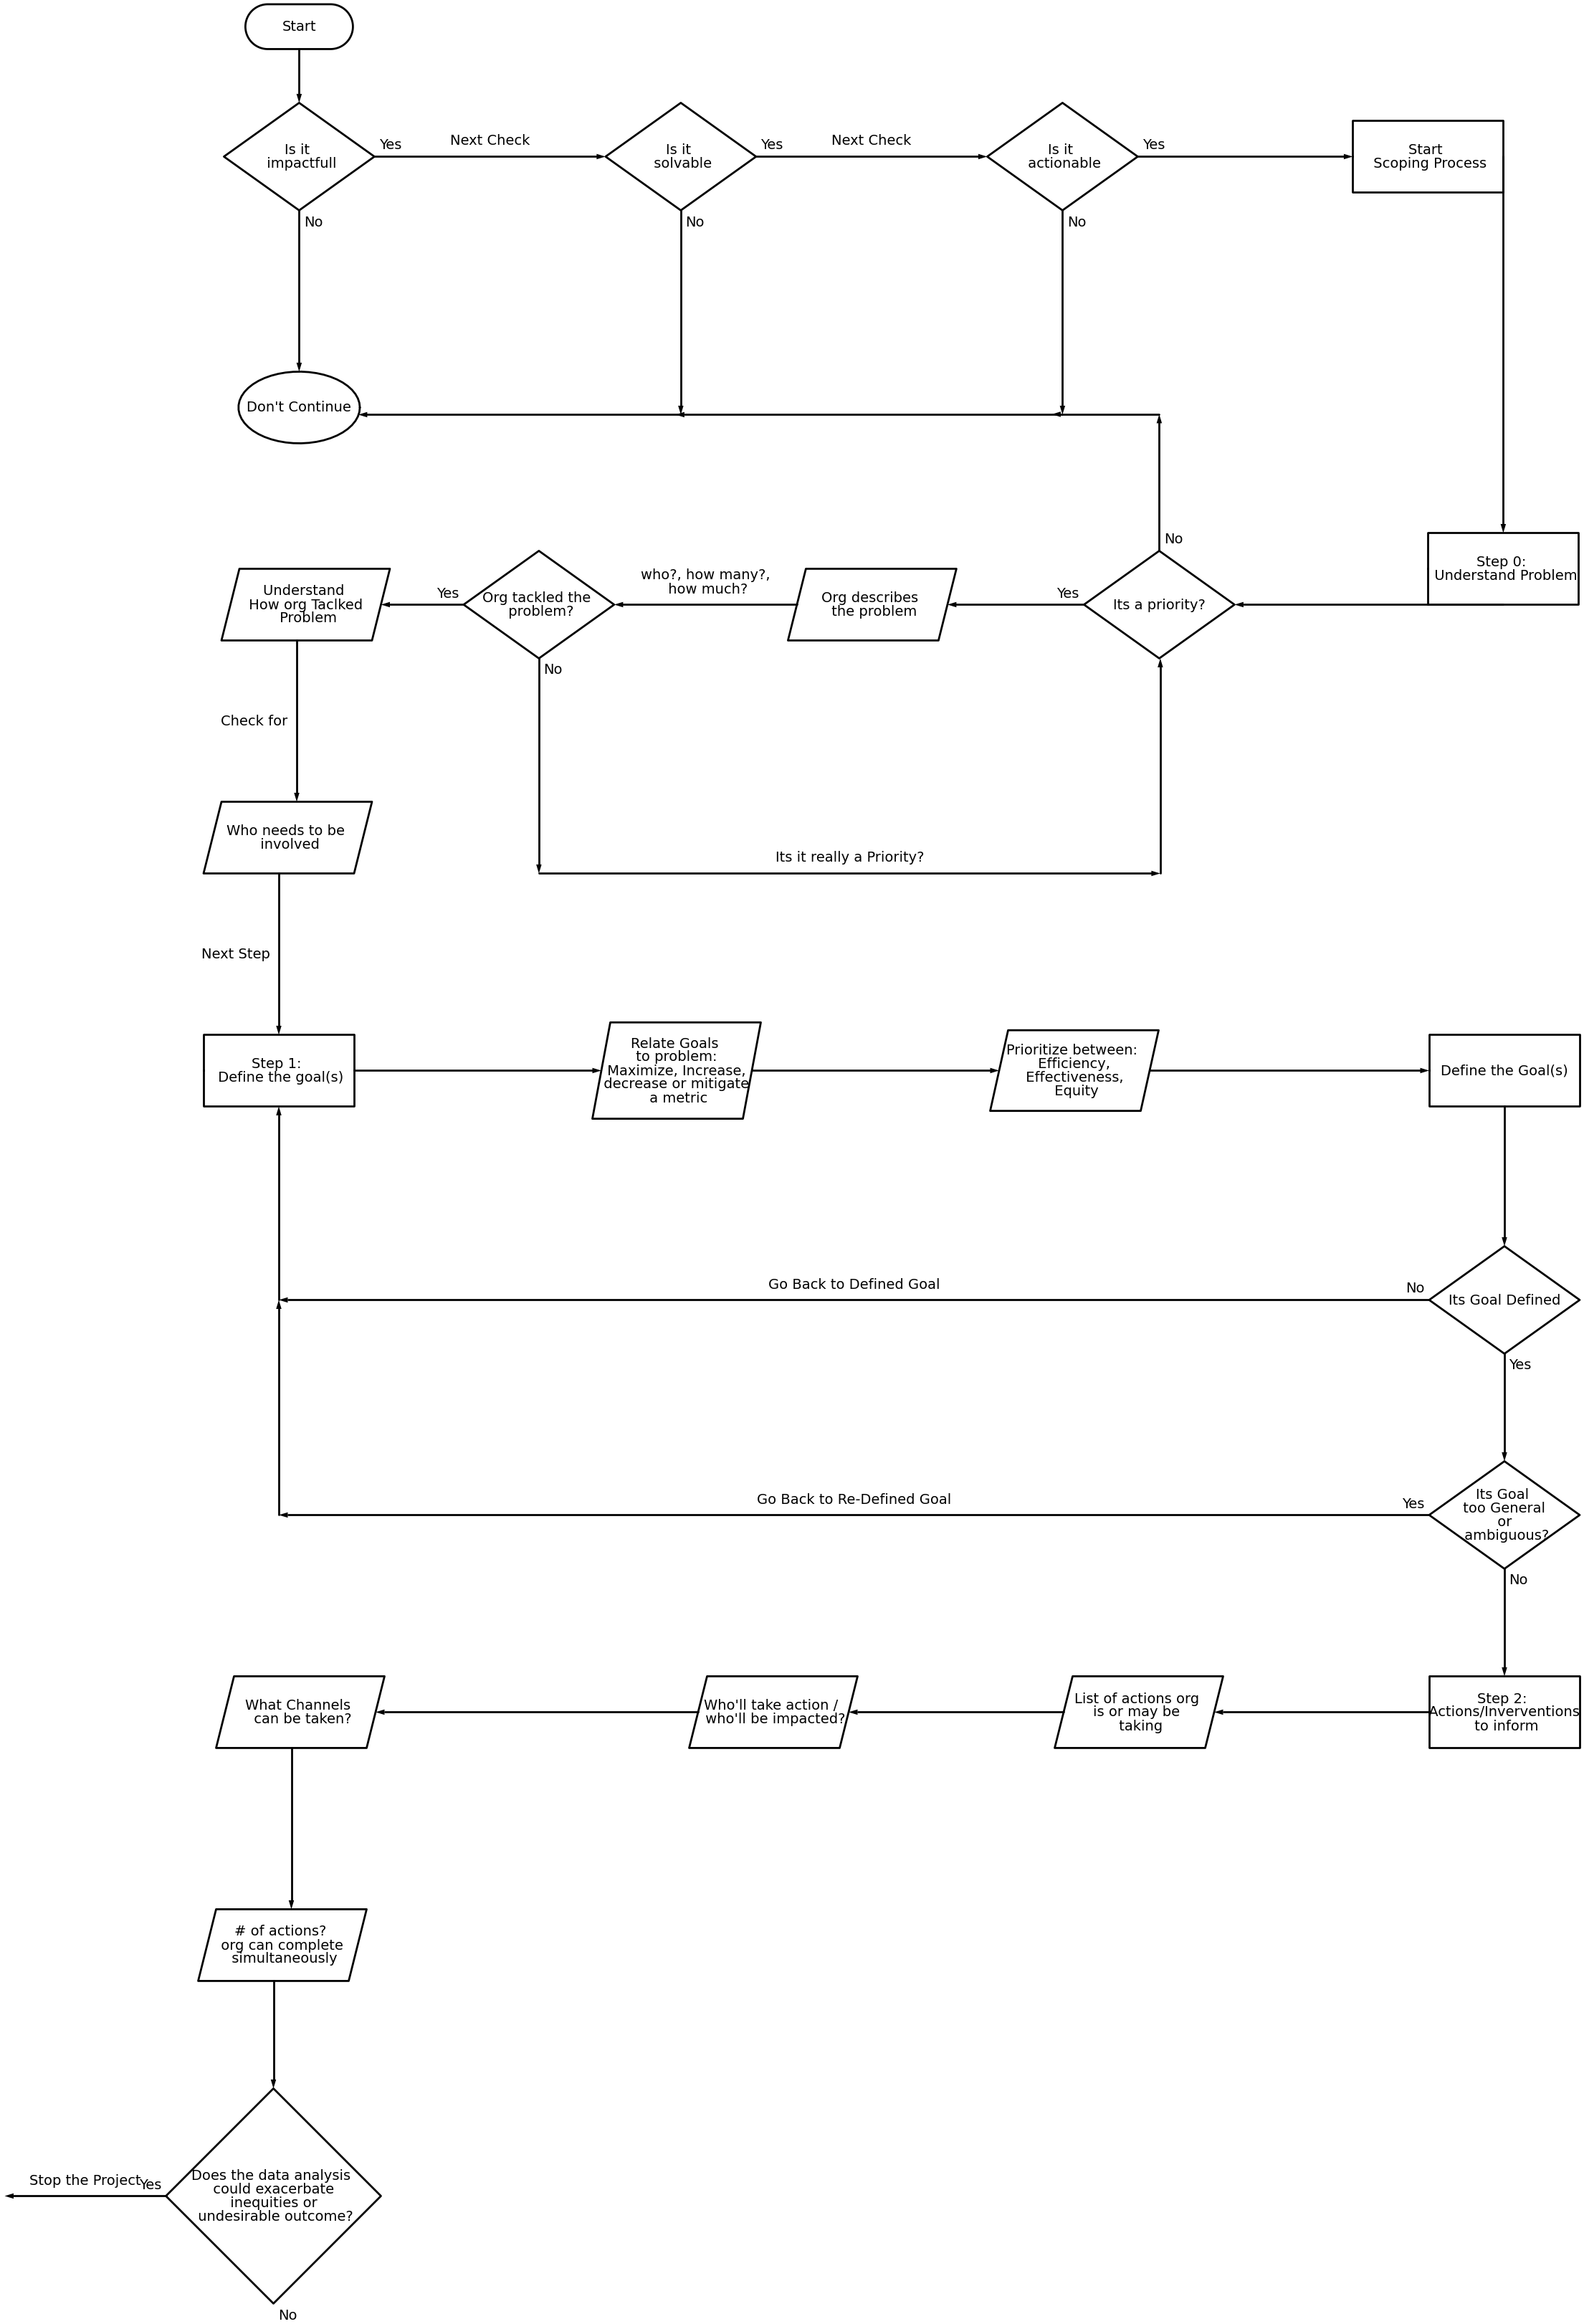

In [4]:
import schemdraw
from schemdraw.flow import *


w = 4.2
h = 3
with schemdraw.Drawing() as d:
    d+= Start().label('Start')
    d+= Arrow().down(d.unit/2)


    
#Decision 1: Impactfull
    d+= (impacful_decision := Decision(w = w, h = h,  E= 'Yes', S = 'No').label('Is it \n impactfull'))
    d+= Arrow().length(d.unit).at(impacful_decision.E).right(d.unit*2.15).label('Next Check')

#Decision 2: Solvable
    d+= (solvable_decision := Decision(w = w, h = h, E = 'Yes', S = 'No').label('Is it \n solvable'))
    d+= Arrow().length(d.unit).at(solvable_decision.E).right(d.unit*2.15).label('Next Check')

#Decision 3: Actionable:
    d+= (actionable_decision := Decision( w = w, h = h, E = 'Yes', S = 'No').label('Is it \n actionable'))
    d+= Arrow().length(d.unit).at(actionable_decision.E).right(d.unit*2).label('')
    

#Starts Scoping Process:
    d+= Process(w = w).label('Start \n Scoping Process')
    d+= Arrow().down(d.unit*3.5)
    
#Step 0: Problem understanding:
    d+= Process(w = w).label('Step 0: \n Understand Problem')
    d+= Arrow().left(d.unit*2.5)

    #Problem Priority Decision
    d+= (priority_decision:= Decision( w = w, h = h, W = 'Yes', N = 'No').label('Its a priority?'))
    d+= Arrow().length(d.unit).at(priority_decision.W).left(d.unit*1.27).label('')

    #Ask Org to Describe the Problem:
    d+= Data(w = w).label('Org describes \n the problem')
    d+= Arrow().left(d.unit*1.7).label('who?, how many?,\n how much?')

    #Has the ORG Tackled the problem? Decision:
    d+= (tackle_problem:= Decision(w = w, h = h, W = 'Yes', S = 'No').label('Org tackled the \n problem?'))
    d+= Arrow().left(d.unit/1.3).label('')

    #Understand How Org Tackled Problem:
    org_tackled = Data(w = w).label('Understand \n How org Taclked \n Problem')
    d+= org_tackled

    #Ask Who Needs to be Involdes:
    d+= Arrow().down(d.unit*1.5).at(org_tackled.S).label('Check for' )
    d+= Data(w = w).label('Who needs to be \n involved')

#Step 1: Define the Goal(s)
    d+= Arrow().down(d.unit*1.5).label('Next Step')
    process_goals = Process(w = w).label('Step 1: \n Define the goal(s)')
    d+= process_goals
    d+= Arrow().right(d.unit*2.3).at(process_goals.E)

    #Relate goals to the problem, Maximize, increase or reduce, decrease, mitigate, etc, a relevant outcome or metric
    d+= Data(w = w).label('Relate Goals \n to problem: \n Maximize, Increase, \n decrease or mitigate \n a metric')
    d+= Arrow().right(d.unit*2.3).label('')

    #Prioritize conflicting goals:
    d+= Data(w = w).label('Prioritize between: \n Efficiency, \n Effectiveness, \n Equity')
    d+= Arrow().right(d.unit*2.6)
    
    #Defined The Goal(s):
    defined_goal = Process(w = w).label('Define the Goal(s)')
    d+= defined_goal
    d+= Arrow().down(d.unit*1.3).at(defined_goal.S)

    #Decision: Goal defined? 
    d+= (goal_defined:= Decision( w = w, h = h, S = 'Yes', W = 'No').label('Its Goal Defined'))
    d+= Arrow().down(d.unit).label('')

    #Goal Ambiguous? or to General?
    d+= (goal_ambiguous_general:= Decision ( w = w, h = h, S = 'No', W = 'Yes').label('Its Goal \n too General \n or \n ambiguous?'))
    d+= Arrow().down(d.unit).label('')

#Step 2: What Actions / interventions are you informing?
    actions_interventions = Process(w = w).label('Step 2: \n Actions/Inverventions \n to inform')
    d+= actions_interventions
    d+= Arrow().left(d.unit*2).at(actions_interventions.W)

    #Create a lis of actions an organizations is taking or may take t o achieve its goal
    d+= Data (w = w).label('List of actions org \nis or may be \n taking')
    d+= Arrow().left(d.unit*2).label('')

    #Who will take this action who is impacted by the action?
    d+= Data (w = w).label('Who\'ll take action / \n who\'ll be impacted?')
    d+= Arrow().left(d.unit*3).label('')

    #Channels than an action can take
    channels = Data (w=w).label('What Channels \n can be taken?') 
    d+= channels
    d+= Arrow().down(d.unit*1.5).at(channels.S).label('')

    ## of Actions org can complete simultaneously
    number_actions = Data (w=w).label('# of actions? \n org can complete \n simultaneously')
    d+= number_actions
    d+= Arrow().down(d.unit).at(number_actions.S).label('')

    #Ethical considerations
    d+= (ethical_decision:= Decision( w = 6, h = 6, W = 'Yes', S = 'No').label('Does the data analysis \n could exacerbate \n inequities or \n undesirable outcome?'))
    

    

    
#No Paths / Go Back Paths:

    #Ethical Stop of the project:
    d+= Arrow().length(d.unit).at(ethical_decision.W).left(d.unit*1.5).label('Stop the Project')

    #Goal Ambiguos or Too General:
    d+= Arrow().length(d.unit).at(goal_ambiguous_general.W).left(d.unit*10.7).label('Go Back to Re-Defined Goal')
    d+= Arrow().length(d.unit).up(d.unit*2)
    
    #No path Goal Defined?:
    d+= Arrow().length(d.unit).at(goal_defined.W).left(d.unit*10.7).label('Go Back to Defined Goal')
    d+= Arrow().length(d.unit).up(d.unit*1.8)
    
    #No Path ORG Tackled Problem
    d+= Arrow().length(d.unit).at(tackle_problem.S).down(d.unit*2).label('')
    d+= Arrow().right(d.unit*5.78).label('Its it really a Priority?')
    d+= Arrow().up(d.unit*2)
    
    #No Path Problem Priority:
    d+= Arrow().length(d.unit).at(priority_decision.N).up(d.unit*1.27).label('')
    d+= Arrow().left(d.unit*1)

    #No path Actionable:
    d+= Arrow().length(d.unit).at(actionable_decision.S).down(d.unit*1.9).label('')
    d+= Arrow().left(d.unit*3.6)
    
    #No Path Solvable:
    d+= Arrow().length(d.unit).at(solvable_decision.S).down(d.unit*1.9).label('')
    d+= Arrow().left(d.unit*3)

    #No Path Impactfull:
    d+= Arrow().length(d.unit).at(impacful_decision.S).down(d.unit*1.5).label('')

    
    #End Data Analysis
    d+= (end := Ellipse().label('Don\'t Continue'))
    




In [ ]:
#Phase 1: Scoping the Project

#Goals: 
#    1.- Explore and Explain Data
#    2.- Clean the Data
#    3.- Analyse data
#.   4.- Clean Data Again
#.   5.- Analyse and remake project Goals
#    6.- Evaluate

In [5]:
#Step 1, import library tools
import pandas as pd
import seaborn as sns
import csv 
from matplotlib import pyplot as plt

#Step 1, visualize scope of the Data

#Exploring observations_file
observations_file = pd.read_csv('observations.csv')
print(display(observations_file.head(10)))
print(display(observations_file.describe()))
print('')
print('Count observations_file: ')
print('')

print((observations_file.count()))
print(' ')
print('Data types observations_file: ')
print(display(observations_file.dtypes))

print('')
print('Nunique observations_file: ')
print(display(observations_file.nunique()))


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


None


,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


None

Count observations_file: 

scientific_name    23296
park_name          23296
observations       23296
dtype: int64
 
Data types observations_file: 


scientific_name    object
park_name          object
observations        int64
dtype: object

None

Nunique observations_file: 


scientific_name    5541
park_name             4
observations        304
dtype: int64

None


/var/folders/b8/3bm2wkd53mq5j3hkct3k0sl80000gn/T/ipykernel_12286/4167751540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'park_name', y = 'observations',  data = observations_file, palette = 'Accent')


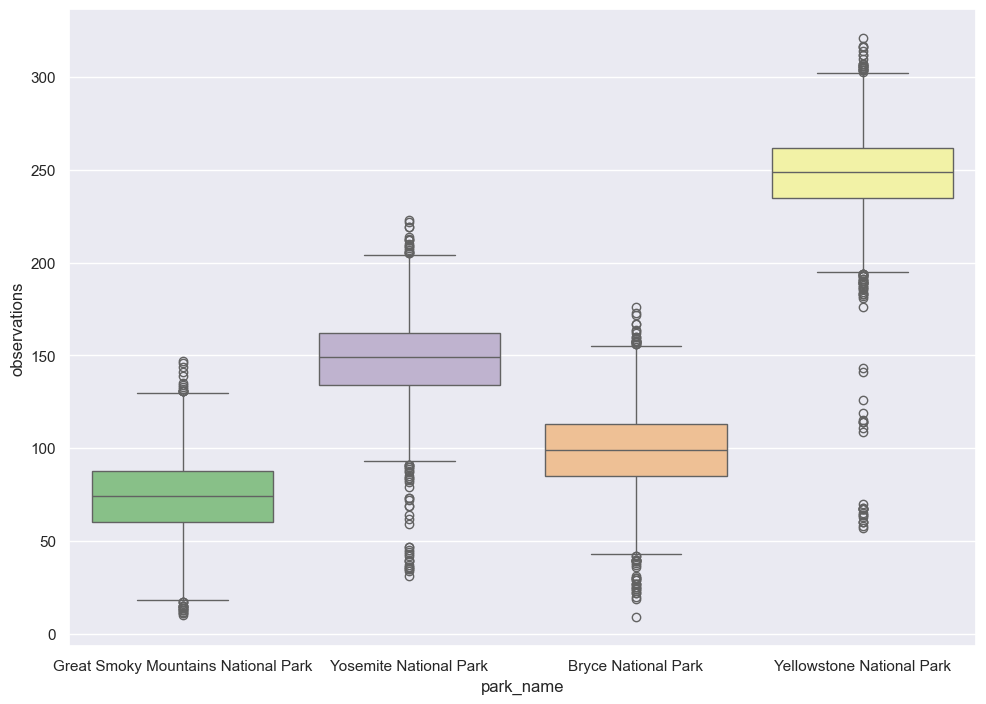

In [142]:

sns.set_theme(rc = {'figure.figsize':(11.7,8.27)})
sns.boxplot(x = 'park_name', y = 'observations',  data = observations_file, palette = 'Accent')
plt.show()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


None


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


None
category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


<Axes: xlabel='category', ylabel='count'>

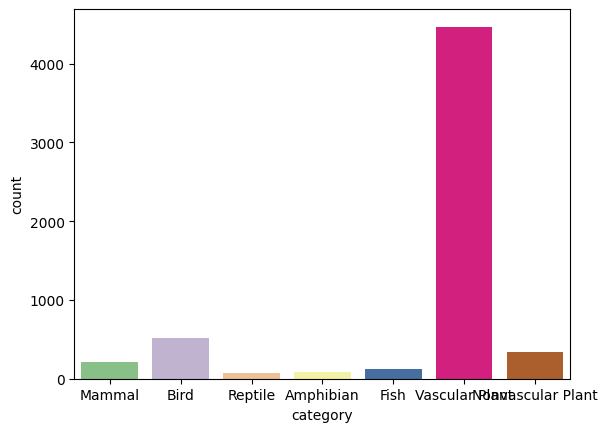

In [6]:
# Exploring species_info file

species_file = pd.read_csv('species_info.csv')
print(display(species_file.head()))
print(display(species_file.describe()))
print(species_file.count())
print(species_file.dtypes)
sns.countplot(x = 'category', data = species_file, palette = 'Accent', hue = 'category')

In [7]:
print('We know that data is about different types of plants')
print('Both data files are about the same info, but they have different columns')
print('Both data files have the same number of nunique values in the scientific_name, we could merge with it')


We know that data is about different types of plants
Both data files are about the same info, but they have different columns
Both data files have the same number of nunique values in the scientific_name, we could merge with it


In [8]:
#Look up for missing data in Observations File
print((observations_file.isna().value_counts()))

scientific_name  park_name  observations
False            False      False           23296
Name: count, dtype: int64


In [9]:
#Look up for missing data in species_file

print(species_file.isna().value_counts())

category  scientific_name  common_names  conservation_status
False     False            False         True                   5633
                                         False                   191
Name: count, dtype: int64


In [10]:

print((len(observations_file) + len(species_file)))
print((len(observations_file) + len(species_file)) - 191)

29120
28929


In [12]:
print('The missing values are less than 5%')
print((191 / 29120)*100)

The missing values are less than 5%
0.6559065934065934


In [13]:
#Check for duplicates in observation_file
observation_duplicates = observations_file.pivot_table(index = ['scientific_name'], aggfunc = 'size')
print(display(observation_duplicates))
print('')
print('Check what are the duplicates about')
print('')

print(observations_file[observations_file['scientific_name'] == 'Abies bifolia'])
print('')
print('It depends on the park that we found that type of plant, \n so we need another scope about what is going to be the id \n or the principal category of each plant')


scientific_name
Abies bifolia                          4
Abies concolor                         4
Abies fraseri                          4
Abietinella abietina                   4
Abronia ammophila                      4
                                      ..
Zonotrichia leucophrys gambelii        4
Zonotrichia leucophrys oriantha        4
Zonotrichia querula                    4
Zygodon viridissimus                   4
Zygodon viridissimus var. rupestris    4
Length: 5541, dtype: int64

None

Check what are the duplicates about

      scientific_name                            park_name  observations
4968    Abies bifolia                  Bryce National Park           109
8050    Abies bifolia            Yellowstone National Park           215
17990   Abies bifolia  Great Smoky Mountains National Park            72
20930   Abies bifolia               Yosemite National Park           136

It depends on the park that we found that type of plant, 
 so we need another scope about what is going to be the id 
 or the principal category of each plant


In [152]:
#Check for nan values in observations_file
print(observations_file.isna().value_counts())
print('\n No Nan Values in observations_file')

scientific_name  park_name  observations
False            False      False           23296
Name: count, dtype: int64

 No Nan Values in observations_file


In [153]:
#Check for duplicates in species_file
duplicates_species_file = species_file.duplicated().value_counts()
print(duplicates_species_file)

False    5824
Name: count, dtype: int64


In [154]:
#Check for nan values in species_file
print(species_file.isna().value_counts())


print(display(species_file.head()))
print(species_file['conservation_status'].unique())


category  scientific_name  common_names  conservation_status
False     False            False         True                   5633
                                         False                   191
Name: count, dtype: int64


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


None
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [15]:
# Now we know that the missing values in conservation_status is that they are not in a conservation_status
# Lets change the NaN Values for a 'Not in danger'

species_file['conservation_status'] = species_file['conservation_status'].fillna('No Status')


In [14]:
print(display(species_file.head()))

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


None


In [16]:
#Lets Merge both dataframes together, using the common scientific_name column in each one
import glob

df_list = []
df_list.append(species_file)



In [27]:
df_list.append(observations_file)
plants_df = pd.merge(species_file, observations_file, on='scientific_name')

In [31]:
display(plants_df.info())
print(plants_df.describe())
print(display(plants_df.head()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   conservation_status  25632 non-null  object
 4   park_name            25632 non-null  object
 5   observations         25632 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


None

       observations
count  25632.000000
mean     142.214693
std       69.912475
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Status,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Status,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Status,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Status,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",No Status,Yosemite National Park,128


None


In [43]:
#Now lets see description and the description of our new already merge dataframe
print(plants_df.info())
print('')

print(plants_df.describe())
print('')

print(plants_df.nunique())
print('')

print(pd.unique(plants_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   conservation_status  25632 non-null  object
 4   park_name            25632 non-null  object
 5   observations         25632 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None

       observations
count  25632.000000
mean     142.214693
std       69.912475
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000

category                  7
scientific_name        5541
common_names           5504
conservation_status       5
park_name                 4
observations            304
dtype: int64



/var/folders/b8/3bm2wkd53mq5j3hkct3k0sl80000gn/T/ipykernel_60077/4005883128.py:11: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  print(pd.unique(plants_df))


ValueError: could not broadcast input array from shape (25632,6) into shape (25632,)